<h1><b><center>Vaccine Stock Analysis during the COVID-19 Pandemic</center></b></h1>

In [95]:
import sys
!{sys.executable} -m pip install altair

In [96]:
import datetime 
import altair as alt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from functools import reduce

<h3>Covid Dataset</h3>

In [97]:
df = pd.read_csv("us_covid19_cases.csv")


In [98]:
df.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'reproduction_rate', 'icu_patients',
       'icu_patients_per_million', 'hosp_patients',
       'hosp_patients_per_million', 'weekly_icu_admissions',
       'weekly_icu_admissions_per_million', 'weekly_hosp_admissions',
       'weekly_hosp_admissions_per_million', 'total_tests', 'new_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'positive_rate', 'tests_per_case', 'tests_units', 'total_vaccinations',
       'people_vaccinated', 'people_fully_vaccinated', 'total_boosters',
       'new_vaccinations', 'new_vaccinations_smoothed',
       't

In [99]:
covid_df = df[['date', 'new_cases', 'new_deaths', 'new_tests', 'new_vaccinations']]

In [100]:
covid_df.head()

,date,new_cases,new_deaths,new_tests,new_vaccinations
0,1/22/2020,NaN,NaN,NaN,NaN
1,1/23/2020,0.0,NaN,NaN,NaN
2,1/24/2020,1.0,NaN,NaN,NaN
3,1/25/2020,0.0,NaN,NaN,NaN
4,1/26/2020,3.0,NaN,NaN,NaN


In [101]:
covid_df.dtypes

date                 object
new_cases           float64
new_deaths          float64
new_tests           float64
new_vaccinations    float64
dtype: object

<h3>Stock Datasts</h3>

In [102]:
df2 = pd.read_csv("moderna.csv")
moderna_df = df2[['date', 'close', 'volume', 'rsi']]

df3 = pd.read_csv("jnj.csv")
jnj_df = df3[['date', 'close', 'volume', 'rsi']]

df4 = pd.read_csv("astra-zeneca.csv")
astra_zeneca_df = df4[['date', 'close', 'volume', 'rsi']]

df5 = pd.read_csv("biontech.csv")
biontech_df = df5[['date', 'close', 'volume', 'rsi']]

df6 = pd.read_csv("novavax.csv")
novavax_df = df6[['date', 'close', 'volume', 'rsi']]

df7 = pd.read_csv("pfizer.csv")
pfizer_df = df7[['date', 'close', 'volume', 'rsi']]

<h3>Merge Datasets</h3>

In [103]:
stock_df = [moderna_df, jnj_df, astra_zeneca_df, biontech_df, novavax_df, pfizer_df]

stock_merged = reduce(lambda left, right: pd.merge(left, right, on=['date'], how='outer'), stock_df)

stock_merged.columns = ['date', 'moderna_closing_price', 'moderna_volume', 'moderna_rsi', 'jnj_closing_price', 'jnj_volume', 'jnj_rsi', 'astra_zeneca_closing_price', 'astra_zeneca_volume', 'astra_zeneca_rsi', 'biontech_closing_price', 'biontech_volume', 'biontech_rsi', 'novavax_closing_price', 'novavax_volume', 'novavax_rsi', 'pfizer_closing_price', 'pfizer_volume', 'pfizer_rsi']


In [104]:
stock_merged.head()

,date,moderna_closing_price,moderna_volume,moderna_rsi,jnj_closing_price,jnj_volume,jnj_rsi,astra_zeneca_closing_price,astra_zeneca_volume,astra_zeneca_rsi,biontech_closing_price,biontech_volume,biontech_rsi,novavax_closing_price,novavax_volume,novavax_rsi,pfizer_closing_price,pfizer_volume,pfizer_rsi
0,2022-04-08,160.84,5454415.0,45.310068,182.12,7144703.0,58.007217,71.14,9082865.0,62.388493,170.26,886206.0,47.024802,60.63,3603222.0,41.168775,55.17,23128622.0,55.231783
1,2022-04-07,159.00,5720873.0,45.059303,181.76,7385291.0,57.800809,71.01,8310168.0,62.271561,169.11,1505572.0,46.875633,59.50,4367650.0,40.924147,55.16,36292543.0,55.220421
2,2022-04-06,154.62,7401800.0,44.465273,182.23,9991790.0,58.166612,69.07,5596805.0,60.474451,166.65,2275843.0,46.560180,62.44,5162016.0,41.362681,52.87,31718155.0,52.515858
3,2022-04-05,162.05,6641095.0,45.279139,177.61,7279617.0,55.450641,67.05,6953316.0,58.455160,180.82,1878969.0,48.174997,65.23,6661778.0,41.779037,51.24,21027857.0,50.427343
4,2022-04-04,172.54,5908675.0,46.455614,176.47,6595724.0,54.740074,66.67,3987163.0,58.060152,186.24,2350714.0,48.809551,75.29,2642969.0,43.319900,50.94,20491602.0,50.030928


In [105]:
stock_merged.dtypes

date                           object
moderna_closing_price         float64
moderna_volume                float64
moderna_rsi                   float64
jnj_closing_price             float64
jnj_volume                    float64
jnj_rsi                       float64
astra_zeneca_closing_price    float64
astra_zeneca_volume           float64
astra_zeneca_rsi              float64
biontech_closing_price        float64
biontech_volume               float64
biontech_rsi                  float64
novavax_closing_price         float64
novavax_volume                float64
novavax_rsi                   float64
pfizer_closing_price          float64
pfizer_volume                 float64
pfizer_rsi                    float64
dtype: object

In [106]:
covid_df['date'] = pd.to_datetime(covid_df['date'])
stock_merged['date'] = pd.to_datetime(stock_merged['date'])
covid_df['new_vaccinations'] = covid_df['new_vaccinations'].fillna(0) # The NaN value in this column cannot be simply dropped since we also need to analyze the data before the vaccination process.
df_merged = pd.merge(covid_df, stock_merged, on='date').dropna()

In [107]:
df_merged.head(10)

,date,new_cases,new_deaths,new_tests,new_vaccinations,moderna_closing_price,moderna_volume,moderna_rsi,jnj_closing_price,jnj_volume,...,astra_zeneca_rsi,biontech_closing_price,biontech_volume,biontech_rsi,novavax_closing_price,novavax_volume,novavax_rsi,pfizer_closing_price,pfizer_volume,pfizer_rsi
27,2020-03-02,23.0,5.0,515.0,0.0,29.88,33084026.0,64.837624,140.020004,11508200.0,...,40.456508,36.60,185100.0,50.791524,12.02,14261700.0,62.899608,33.092979,42034469.0,37.171087
28,2020-03-03,19.0,1.0,620.0,0.0,27.91,17599114.0,61.075243,135.589996,13662500.0,...,39.738102,38.48,297900.0,52.850212,10.78,9957300.0,59.621290,32.542694,46174475.0,35.568345
29,2020-03-04,33.0,4.0,891.0,0.0,27.49,11817666.0,60.313849,143.479996,10560500.0,...,48.025686,39.19,127100.0,53.598311,11.32,10977400.0,60.535314,34.535103,38712155.0,44.422057
30,2020-03-05,77.0,1.0,1203.0,0.0,28.01,14669976.0,60.929202,142.009995,11339200.0,...,47.549072,37.12,77000.0,51.182375,12.87,14057100.0,62.989154,33.643265,35096303.0,41.798627
31,2020-03-06,53.0,2.0,1523.0,0.0,29.61,21097488.0,62.742982,142.029999,12239100.0,...,45.738435,38.09,279200.0,52.212347,12.48,13250800.0,61.999390,33.225807,40931036.0,40.651919
32,2020-03-09,75.0,1.0,2399.0,0.0,24.29,14124076.0,54.205308,136.440002,13848600.0,...,41.449773,33.48,190200.0,47.365959,10.02,8328800.0,56.304878,32.030361,43183856.0,37.634936
33,2020-03-10,188.0,6.0,3481.0,0.0,22.34,13019516.0,51.580159,141.639999,12698100.0,...,45.268621,33.96,327500.0,47.879960,10.65,12365400.0,57.329068,32.817837,40548329.0,40.598216
34,2020-03-11,365.0,5.0,4833.0,0.0,23.61,14825434.0,53.089965,131.800003,17763400.0,...,41.437368,32.17,119000.0,46.164460,10.51,9052100.0,57.025971,30.521822,65350213.0,35.569873
35,2020-03-12,439.0,10.0,8891.0,0.0,22.30,11305347.0,51.402919,125.410004,21539200.0,...,36.278622,28.55,184100.0,42.986160,9.29,5488400.0,54.465420,28.481974,62731445.0,31.979150
36,2020-03-13,633.0,8.0,11732.0,0.0,21.30,11853052.0,50.161307,134.289993,20084200.0,...,39.344643,30.93,197600.0,45.503257,8.41,6115400.0,52.722981,31.034157,60553038.0,39.744867


In [108]:
df_merged.dtypes

date                          datetime64[ns]
new_cases                            float64
new_deaths                           float64
new_tests                            float64
new_vaccinations                     float64
moderna_closing_price                float64
moderna_volume                       float64
moderna_rsi                          float64
jnj_closing_price                    float64
jnj_volume                           float64
jnj_rsi                              float64
astra_zeneca_closing_price           float64
astra_zeneca_volume                  float64
astra_zeneca_rsi                     float64
biontech_closing_price               float64
biontech_volume                      float64
biontech_rsi                         float64
novavax_closing_price                float64
novavax_volume                       float64
novavax_rsi                          float64
pfizer_closing_price                 float64
pfizer_volume                        float64
pfizer_rsi

In [109]:
df_merged = df_merged[(df_merged['date']>='2020-03-01') & (df_merged['date']<'2022-04-01')]
df_merged.head()

,date,new_cases,new_deaths,new_tests,new_vaccinations,moderna_closing_price,moderna_volume,moderna_rsi,jnj_closing_price,jnj_volume,...,astra_zeneca_rsi,biontech_closing_price,biontech_volume,biontech_rsi,novavax_closing_price,novavax_volume,novavax_rsi,pfizer_closing_price,pfizer_volume,pfizer_rsi
27,2020-03-02,23.0,5.0,515.0,0.0,29.88,33084026.0,64.837624,140.020004,11508200.0,...,40.456508,36.60,185100.0,50.791524,12.02,14261700.0,62.899608,33.092979,42034469.0,37.171087
28,2020-03-03,19.0,1.0,620.0,0.0,27.91,17599114.0,61.075243,135.589996,13662500.0,...,39.738102,38.48,297900.0,52.850212,10.78,9957300.0,59.621290,32.542694,46174475.0,35.568345
29,2020-03-04,33.0,4.0,891.0,0.0,27.49,11817666.0,60.313849,143.479996,10560500.0,...,48.025686,39.19,127100.0,53.598311,11.32,10977400.0,60.535314,34.535103,38712155.0,44.422057
30,2020-03-05,77.0,1.0,1203.0,0.0,28.01,14669976.0,60.929202,142.009995,11339200.0,...,47.549072,37.12,77000.0,51.182375,12.87,14057100.0,62.989154,33.643265,35096303.0,41.798627
31,2020-03-06,53.0,2.0,1523.0,0.0,29.61,21097488.0,62.742982,142.029999,12239100.0,...,45.738435,38.09,279200.0,52.212347,12.48,13250800.0,61.999390,33.225807,40931036.0,40.651919


<h2>Data Analysis</h2>

<h3>Q1: How did each pharmaceutical stock perform during the pandemic, and is there a trend between performance and COVID-19 cases?</h3>

In [110]:
df1 = df_merged[["date","new_cases","new_deaths","new_vaccinations","moderna_closing_price","jnj_closing_price",
                 "astra_zeneca_closing_price","biontech_closing_price",
                 "novavax_closing_price","pfizer_closing_price"]]

#normalize values
df1['cases'] = round(100*df1['new_cases']/df1['new_cases'].max())
df1['deaths'] = round(100*df1['new_deaths']/df1['new_deaths'].max())
df1['vaccinations'] = round(100*df1['new_vaccinations']/df1['new_vaccinations'].max())
df1['moderna'] = round(100*df1['moderna_closing_price']/df1['moderna_closing_price'].max())
df1['jnj'] = round(100*df1['jnj_closing_price']/df1['jnj_closing_price'].max())
df1['astra_zeneca'] = round(100*df1['astra_zeneca_closing_price']/df1['astra_zeneca_closing_price'].max())
df1['biontech'] = round(100*df1['biontech_closing_price']/df1['biontech_closing_price'].max())
df1['novavax'] = round(100*df1['novavax_closing_price']/df1['novavax_closing_price'].max())
df1['pfizer'] = round(100*df1['pfizer_closing_price']/df1['pfizer_closing_price'].max())

#normalized df
normalized_df = df1[["date","cases","deaths","vaccinations","moderna","jnj","astra_zeneca","biontech","novavax","pfizer"]]

In [111]:
#melted_dfs for covid cases viz
moderna_df = normalized_df[["date","cases","moderna"]]
moderna = pd.melt(moderna_df, id_vars=["date"],value_vars=["cases","moderna"])
jnj_df = normalized_df[["date","cases","jnj"]]
jnj = pd.melt(jnj_df, id_vars=["date"],value_vars=["cases","jnj"])
astra_zeneca_df = normalized_df[["date","cases","astra_zeneca"]]
astra_zeneca = pd.melt(astra_zeneca_df, id_vars=["date"],value_vars=["cases","astra_zeneca"])
biontech_df = normalized_df[["date","cases","biontech"]]
biontech = pd.melt(biontech_df, id_vars=["date"],value_vars=["cases","biontech"])
novavax_df = normalized_df[["date","cases","novavax"]]
novavax = pd.melt(novavax_df, id_vars=["date"],value_vars=["cases","novavax"])
pfizer_df = normalized_df[["date","cases","pfizer"]]
pfizer = pd.melt(pfizer_df, id_vars=["date"],value_vars=["cases","pfizer"])

dfs=[moderna,jnj,astra_zeneca,biontech,novavax,pfizer]

#create covid cases charts
charts=[]
for df in dfs:
    charts.append(
        alt.Chart(df,title=alt.TitleParams(str(df.iloc[-1,1]),fontSize=12)
                 ).mark_line(
                 ).transform_window(
                        rolling_30d_mean='mean(value)',
                        frame=[-15, 15],
                        groupby=['variable']
                 ).encode(
                        x=alt.X('date',
                                axis=alt.Axis(labels=True),
                                title='date'),
                        y=alt.Y('rolling_30d_mean:Q',
                                scale=alt.Scale(domain=[0, 100]),
                               title='rolling mean'),
                        color=alt.Color('variable',legend=alt.Legend(direction='vertical', titleAnchor='middle')),
                        tooltip=['variable:N',alt.Tooltip('rolling_30d_mean:Q', format='.2f')]
                 ).properties(
                        width=325,
                        height=100
                 )
                 )

x = alt.vconcat(charts[0], charts[1], charts[2])
y = alt.vconcat(charts[3], charts[4], charts[5])

(x|y).properties(title="30-day Rolling Average Covid Cases vs. Stocks"
                ).configure_title(fontSize=14,anchor='middle')

alt.HConcatChart(...)

In [112]:
#melted_dfs for covid deaths
moderna_df = normalized_df[["date","deaths","moderna"]]
moderna = pd.melt(moderna_df, id_vars=["date"],value_vars=["deaths","moderna"])
jnj_df = normalized_df[["date","deaths","jnj"]]
jnj = pd.melt(jnj_df, id_vars=["date"],value_vars=["deaths","jnj"])
astra_zeneca_df = normalized_df[["date","deaths","astra_zeneca"]]
astra_zeneca = pd.melt(astra_zeneca_df, id_vars=["date"],value_vars=["deaths","astra_zeneca"])
biontech_df = normalized_df[["date","deaths","biontech"]]
biontech = pd.melt(biontech_df, id_vars=["date"],value_vars=["deaths","biontech"])
novavax_df = normalized_df[["date","deaths","novavax"]]
novavax = pd.melt(novavax_df, id_vars=["date"],value_vars=["deaths","novavax"])
pfizer_df = normalized_df[["date","deaths","pfizer"]]
pfizer = pd.melt(pfizer_df, id_vars=["date"],value_vars=["deaths","pfizer"])

dfs=[moderna,jnj,astra_zeneca,biontech,novavax,pfizer]

#create covid deaths charts
charts=[]
for df in dfs:
    charts.append(
        alt.Chart(df,title=alt.TitleParams(str(df.iloc[-1,1]),fontSize=12)
                 ).mark_line(
                 ).transform_window(
                        rolling_30d_mean='mean(value)',
                        frame=[-15, 15],
                        groupby=['variable']
                 ).encode(
                        x=alt.X('date',
                                axis=alt.Axis(labels=True),
                                title='date'),
                        y=alt.Y('rolling_30d_mean:Q',
                                scale=alt.Scale(domain=[0, 100]),
                               title='rolling mean'),
                        color=alt.Color('variable',legend=alt.Legend(direction='vertical', titleAnchor='middle')),
                        tooltip=['variable:N',alt.Tooltip('rolling_30d_mean:Q', format='.2f')]
                 ).properties(
                        width=325,
                        height=100
                 )
                 )

x = alt.vconcat(charts[0], charts[1], charts[2])
y = alt.vconcat(charts[3], charts[4], charts[5])

(x|y).properties(title="30-day Rolling Average Covid Deaths vs. Stocks"
                ).configure_title(fontSize=14,anchor='middle')

alt.HConcatChart(...)

In [113]:
#melted_dfs for covid vaccinations
moderna_df = normalized_df[["date","vaccinations","moderna"]]
moderna = pd.melt(moderna_df, id_vars=["date"],value_vars=["vaccinations","moderna"])
jnj_df = normalized_df[["date","vaccinations","jnj"]]
jnj = pd.melt(jnj_df, id_vars=["date"],value_vars=["vaccinations","jnj"])
astra_zeneca_df = normalized_df[["date","vaccinations","astra_zeneca"]]
astra_zeneca = pd.melt(astra_zeneca_df, id_vars=["date"],value_vars=["vaccinations","astra_zeneca"])
biontech_df = normalized_df[["date","vaccinations","biontech"]]
biontech = pd.melt(biontech_df, id_vars=["date"],value_vars=["vaccinations","biontech"])
novavax_df = normalized_df[["date","vaccinations","novavax"]]
novavax = pd.melt(novavax_df, id_vars=["date"],value_vars=["vaccinations","novavax"])
pfizer_df = normalized_df[["date","vaccinations","pfizer"]]
pfizer = pd.melt(pfizer_df, id_vars=["date"],value_vars=["vaccinations","pfizer"])

dfs=[moderna,jnj,astra_zeneca,biontech,novavax,pfizer]

#create covid vaccinations charts
charts=[]
for df in dfs:
    charts.append(
        alt.Chart(df,title=alt.TitleParams(str(df.iloc[-1,1]),fontSize=12)
                 ).mark_line(
                 ).transform_window(
                        rolling_30d_mean='mean(value)',
                        frame=[-15, 15],
                        groupby=['variable']
                 ).encode(
                        x=alt.X('date',
                                axis=alt.Axis(labels=True),
                                title='date'),
                        y=alt.Y('rolling_30d_mean:Q',
                                scale=alt.Scale(domain=[0, 100]),
                               title='rolling_mean'),
                        color=alt.Color('variable', legend=alt.Legend(direction='vertical', titleAnchor='middle')
                                       ),
                        tooltip=['variable:N',alt.Tooltip('rolling_30d_mean:Q', format='.2f')]
                 ).properties(
                        width=325,
                        height=100
                 )
                 )

x = alt.vconcat(charts[0], charts[1], charts[2])
y = alt.vconcat(charts[3], charts[4], charts[5])

(x|y).properties(title="30-day Rolling Average Covid Vaccinations vs. Stocks"
                ).configure_title(fontSize=14,anchor='middle')

alt.HConcatChart(...)

<h3>Q2: Is there a positive or negative relationship between COVID-19 cases and pharmaceutical stock prices of the aforementioned companies? Could a rise in COVID-19 cases be used as a factor to predict a rise in pharmaceutical stock prices?
</h3>

<h3>Q3: Assuming there is a pattern/relationship, what are the nuances that explain any breaks from the pattern between COVID-19 cases and stock prices? If not, what else could be the core indicators?
</h3>

Since there were no obvious trends and correlations have been observed from the patterns created in Question 1. We would like to further analyse the relationship between techinical trading indicator, Relative Strength Index (RSI) and stock price.

The basic idea behind the RSI is to measure how quickly traders are bidding the price of the security up or down. The RSI plots this result on a scale of 0 to 100. An asset is usually considered overbought when the RSI is above 70% and oversold when it is below 30%.

In [114]:
stock_names = ['moderna', 'jnj', 'biontech', 'novavax', 'pfizer', 'astra_zeneca']
rsi_df = df_merged[["date","new_cases","new_deaths","new_vaccinations","moderna_closing_price","jnj_closing_price",
                 "astra_zeneca_closing_price","biontech_closing_price", "novavax_closing_price","pfizer_closing_price",
                    "moderna_rsi","jnj_rsi", "astra_zeneca_rsi", "biontech_rsi", "novavax_rsi","pfizer_rsi"]]

for stock_name in stock_names:
    norm_name = f'{stock_name}_normalized_closing_price'
    closing_price = f'{stock_name}_closing_price'
    rsi_df[norm_name] = round(100 * rsi_df[closing_price] / rsi_df[closing_price].max())


In [115]:
stock_rsi_dfs = {}
stock_rsi = {}

for stock_name in stock_names:
    df = rsi_df[["date", f"{stock_name}_normalized_closing_price", f"{stock_name}_closing_price", f"{stock_name}_rsi"]]
    df.rename(columns={f'{stock_name}_normalized_closing_price': 'normalized_closing_price', f'{stock_name}_rsi': 'rsi', f"{stock_name}_closing_price": "closing_price"}, inplace=True)
    stock_rsi_dfs.update({stock_name: df})
    rsi = pd.melt(df, id_vars=["date"],value_vars=["normalized_closing_price", "rsi"])
    stock_rsi.update({stock_name: rsi})


In [119]:
# rsi vs stock price
charts=[]
for title, df in stock_rsi.items():
    charts.append(
        alt.Chart(df, title=alt.TitleParams(title, fontSize=12)
                 ).mark_line(
                 ).transform_window(
                        rolling_30d_mean='mean(value)',
                        frame=[-15, 15],
                        groupby=['variable']
                 ).encode(
                        x=alt.X('date:T',
                                axis=alt.Axis(labels=True),
                                title='date'),
                        y=alt.Y('rolling_30d_mean:Q',
                                scale=alt.Scale(domain=[0, 100]),
                               title='rolling_30d_mean mean'),
                        color=alt.Color('variable', legend=alt.Legend(direction='vertical', titleAnchor='middle')
                                       ),
                        tooltip=['variable:N',alt.Tooltip('rolling_30d_mean:Q', format='.2f')]
                 ).properties(
                        width=375,
                        height=250
                 )
        )
    
        
x = alt.vconcat(charts[0], charts[1], charts[2])
y = alt.vconcat(charts[3], charts[4], charts[5])

(x|y).properties(title="30-day Rolling Average Relative Strength Index vs. Stock Price"
                ).configure_title(fontSize=14,anchor='middle')

alt.HConcatChart(...)

The patterns of Pfizer, Astra Zeneca and Johnson & Johnson show a quiet strong correlation bewteen rsi and stock price. But RSI seems not a core indicator for Moderna, Biontech and Novavax. There must be some other factors influcend the stock price at the same time.

So we can pick some typical short-term scenarios and do the following analysis. 

In [117]:
def set_chart_annotaion(x_line_annotation, x_text_annotation, x_line_annotation2, y_value, reason):
    ax[i].axvline(x=x_line_annotation, linestyle='dashed', alpha=0.5)
    ax[i].text(x=x_text_annotation, y=y_value, s=reason, alpha=0.7, color='#7E3517', fontsize=16)
    ax[i].axvline(x=x_line_annotation2, linestyle='dashed', alpha=0.5)

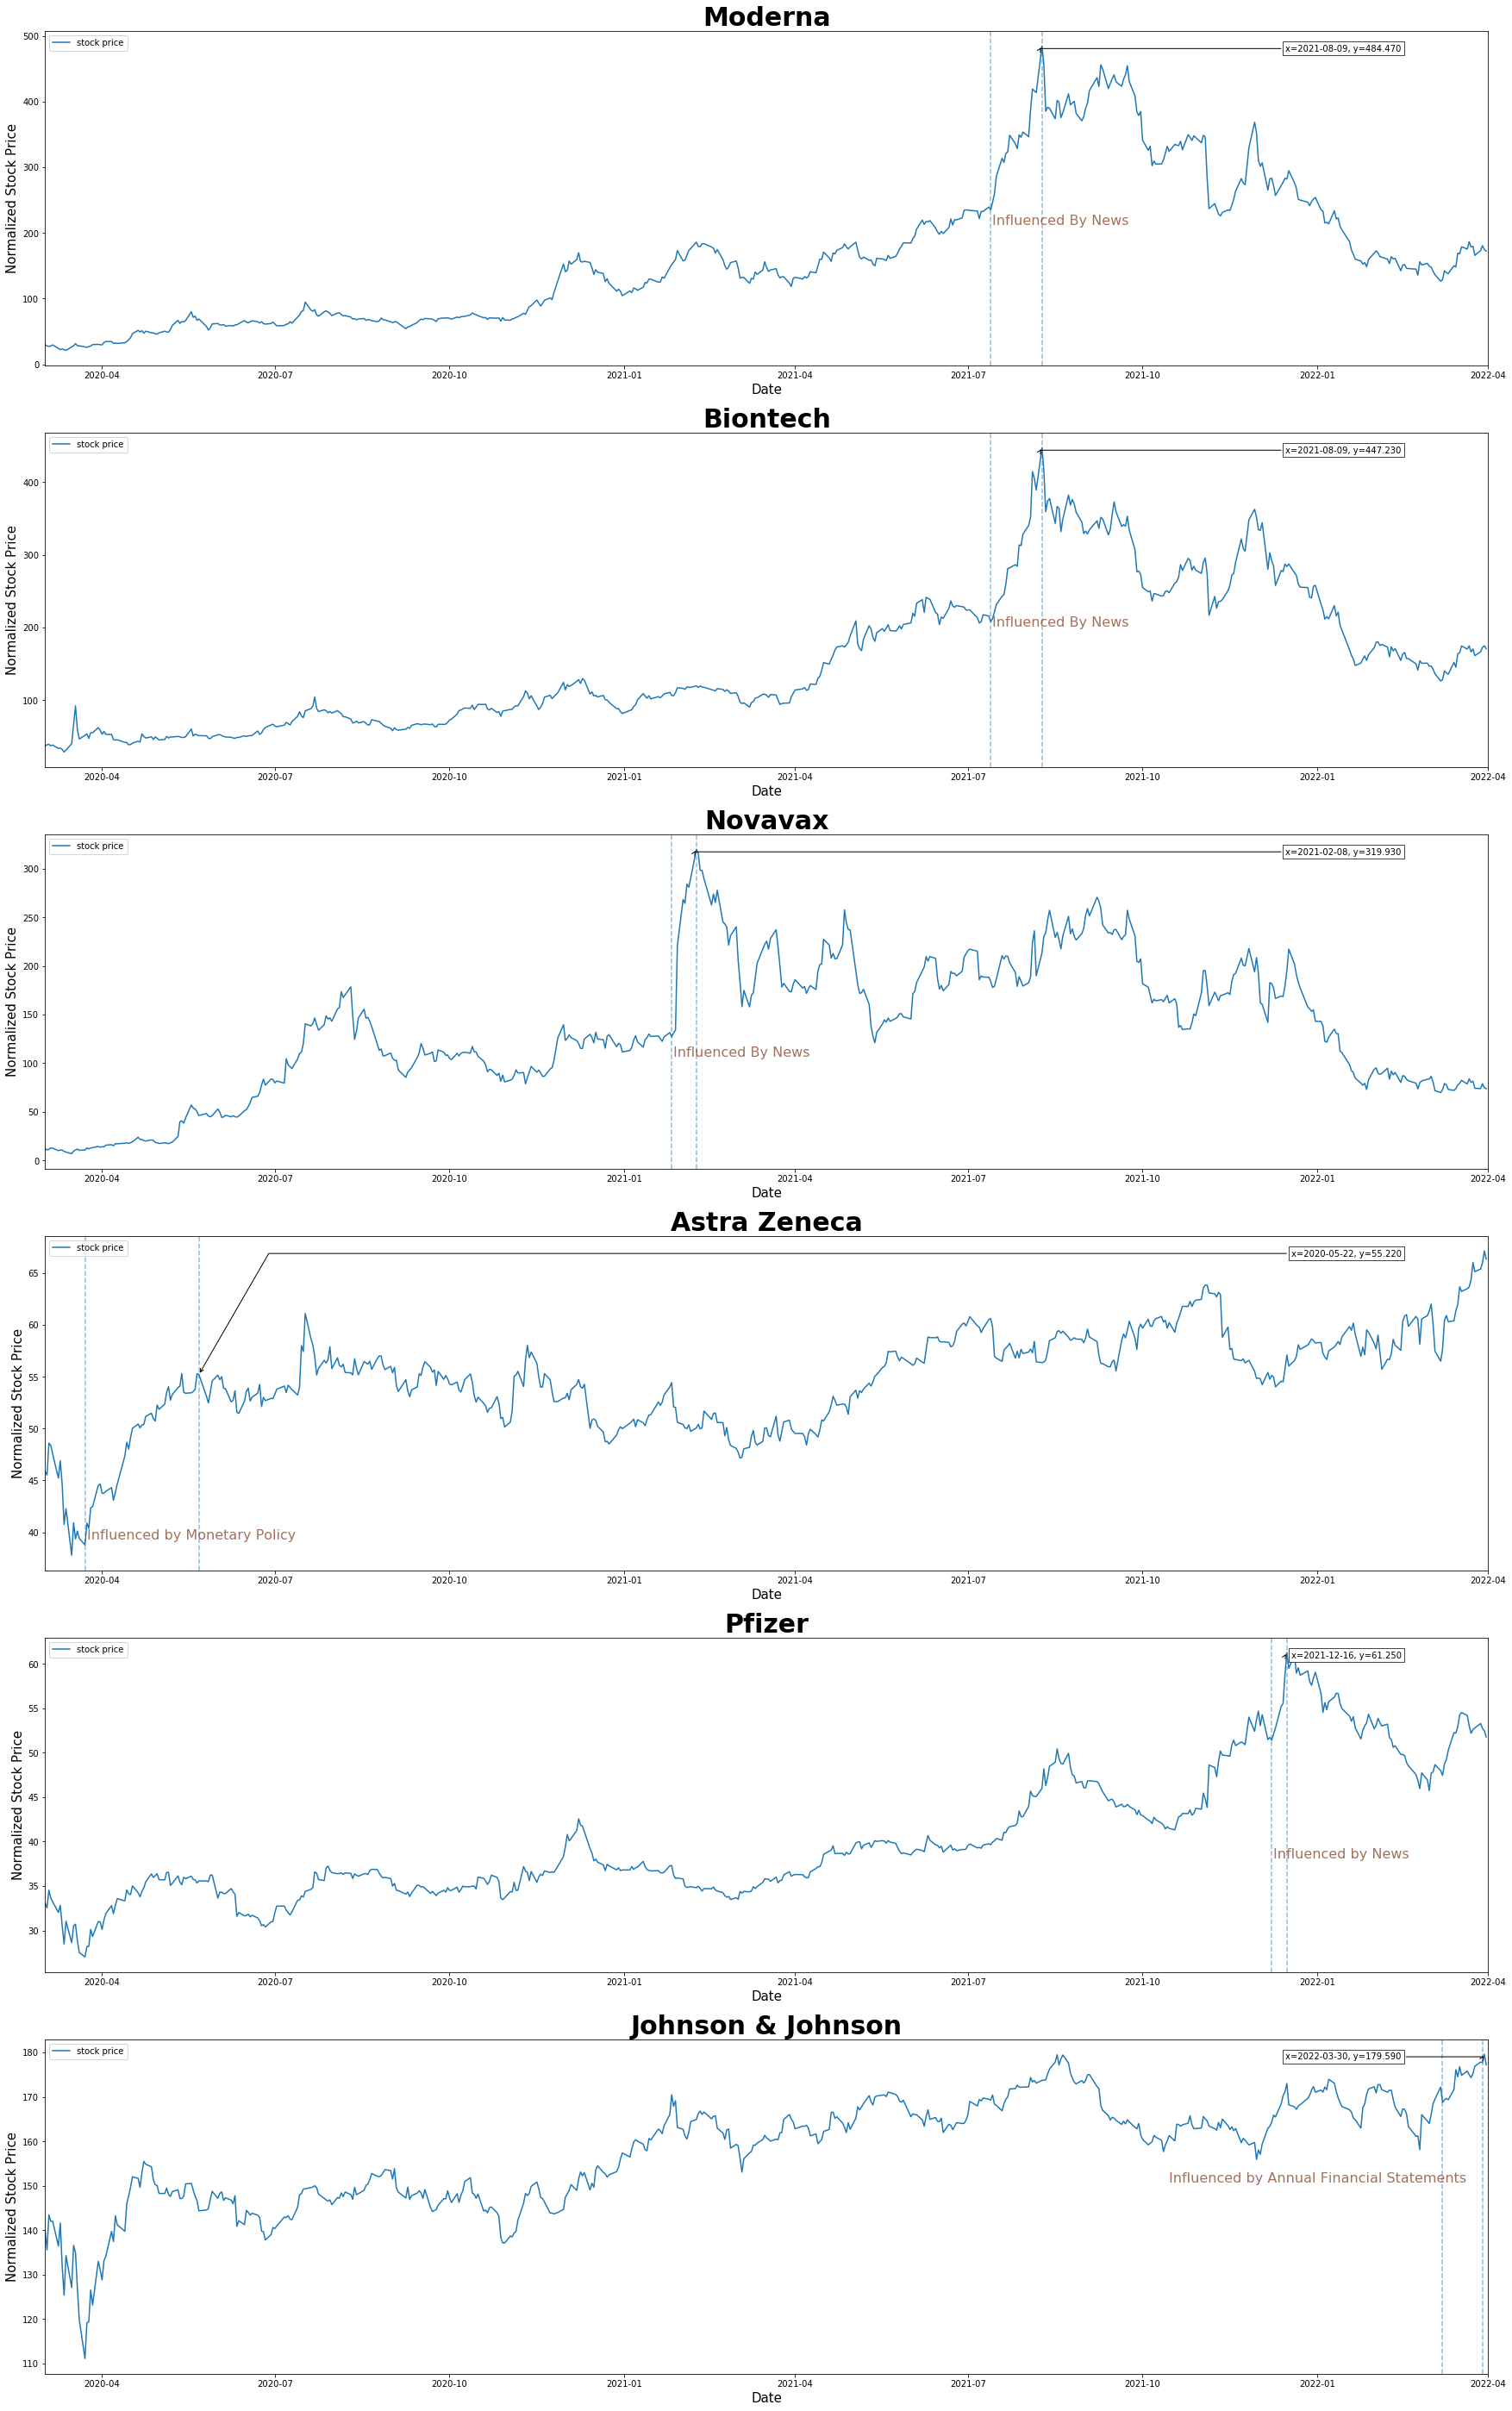

In [118]:
single_rsi_dfs = [{'moderna': stock_rsi_dfs['moderna']}, {'biontech': stock_rsi_dfs['biontech']}, {"novavax": stock_rsi_dfs['novavax']}, {"astra zeneca": stock_rsi_dfs['astra_zeneca']},
                  {"pfizer": stock_rsi_dfs['pfizer']}, {"johnson & johnson": stock_rsi_dfs['jnj']}]

fig, ax = plt.subplots(6,1,figsize=(30,50))

for i in range(len(single_rsi_dfs)):
    df = list(single_rsi_dfs[i].values())[0]
    stock_name = list(single_rsi_dfs[i].keys())[0]
    x = df['date']
    y = df['closing_price']
    ax[i].plot(x, y, label='stock price')
    ax[i].legend(loc='upper left')
    ax[i].set_title(stock_name.title(), fontweight="bold", size=30)
    ax[i].set_xlabel('Date', size=15)
    ax[i].set_ylabel('Normalized Stock Price', size=15)
    if stock_name == 'moderna':
        set_chart_annotaion(datetime.datetime(2021, 7, 13), datetime.datetime(2021, 7, 14), 
                            datetime.datetime(2021, 8, 9), 212.940, 'Influenced By News')
        
    if stock_name == 'biontech':
        set_chart_annotaion(datetime.datetime(2021, 7, 13), datetime.datetime(2021, 7, 14), 
                            datetime.datetime(2021, 8, 9), 201.230, 'Influenced By News')

    if stock_name == 'novavax':
        set_chart_annotaion(datetime.datetime(2021, 1, 26), datetime.datetime(2021, 1, 27), 
                            datetime.datetime(2021, 2, 8), 107.160, 'Influenced By News')
        
    if stock_name == "astra zeneca":
        set_chart_annotaion(datetime.datetime(2020, 3, 23), datetime.datetime(2020, 3, 24), 
                            datetime.datetime(2020, 5, 22), 39.360, 'Influenced by Monetary Policy')
        
    if stock_name == "pfizer":
        set_chart_annotaion(datetime.datetime(2021, 12, 8), datetime.datetime(2021, 12, 9), 
                            datetime.datetime(2021, 12, 16), 38.110, 'Influenced by News')
        
    if stock_name == "johnson & johnson":
        set_chart_annotaion(datetime.datetime(2022, 3, 8), datetime.datetime(2021, 10, 15), 
                            datetime.datetime(2022, 3, 29), 150.72, 'Influenced by Annual Financial Statements')


    xmax = x[np.argmax(y)].strftime("%Y-%m-%d")
    ymax = y.max()
    text= "x={}, y={:.3f}".format(xmax, ymax)
    if not ax[i]:
        ax=plt.gca()
    bbox_props = dict(boxstyle="square,pad=0.3", fc="w", ec="k", lw=0.72)
    arrowprops=dict(arrowstyle="->",connectionstyle="angle,angleA=0,angleB=60")
    kw = dict(xycoords='data',textcoords="axes fraction",
              arrowprops=arrowprops, bbox=bbox_props, ha="right", va="top")
    
    if stock_name == "astra zeneca":
        ax[i].annotate("x=2020-05-22, y=55.220", xy=('2020-05-22', 55.22), xytext=(0.94,0.96), **kw)
    else:
        ax[i].annotate(text, xy=(xmax, ymax), xytext=(0.94,0.96), **kw)
        
    ax[i].set_xlim([datetime.date(2020, 3, 2).strftime("%Y-%m-%d"), datetime.date(2022, 4, 1).strftime("%Y-%m-%d")])

plt.show()


In conclusion, the stock price of pharmaceutical companies from 2020-03-01 to 2022-04-01 do not have strong correlation with covid-19 cases. The trend indicators can be numerous and diverse, such as macroscopical monetary policy, relative strength index, social sentiment, negative news, their quarterly/annualy finialcial statements and etc.
